In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv(
    "US_Accidents_March23.csv",
    nrows=100000,
    engine="python",
    on_bad_lines="skip"
)

In [4]:
print(df.shape)
df.head()

(99985, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.92805900000001,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.20558199999998,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99985 entries, 0 to 99984
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     99985 non-null  object 
 1   Source                 99985 non-null  object 
 2   Severity               99985 non-null  float64
 3   Start_Time             99985 non-null  object 
 4   End_Time               99985 non-null  object 
 5   Start_Lat              99985 non-null  object 
 6   Start_Lng              99985 non-null  object 
 7   End_Lat                49589 non-null  object 
 8   End_Lng                49589 non-null  object 
 9   Distance(mi)           99984 non-null  object 
 10  Description            99985 non-null  object 
 11  Street                 99983 non-null  object 
 12  City                   99979 non-null  object 
 13  County                 99983 non-null  object 
 14  State                  99983 non-null  object 
 15  Zi

In [6]:
df.isnull().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  50396
End_Lng                  50396
Distance(mi)                 1
Description                  0
Street                       2
City                         6
County                       2
State                        2
Zipcode                     57
Country                      2
Timezone                   138
Airport_Code               204
Weather_Timestamp         1029
Temperature(F)            1659
Wind_Chill(F)            94742
Humidity(%)               1894
Pressure(in)              1399
Visibility(mi)            1903
Wind_Direction            1031
Wind_Speed(mph)          18554
Precipitation(in)        91143
Weather_Condition         1933
Amenity                      3
Bump                         3
Crossing                     5
Give_Way

In [7]:
df["Start_Time"] = pd.to_datetime(
    df["Start_Time"], 
    errors="coerce"
)

print(df["Start_Time"].isnull().sum())

1


In [8]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [9]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

In [10]:
df["Hour"] = df["Start_Time"].dt.hour

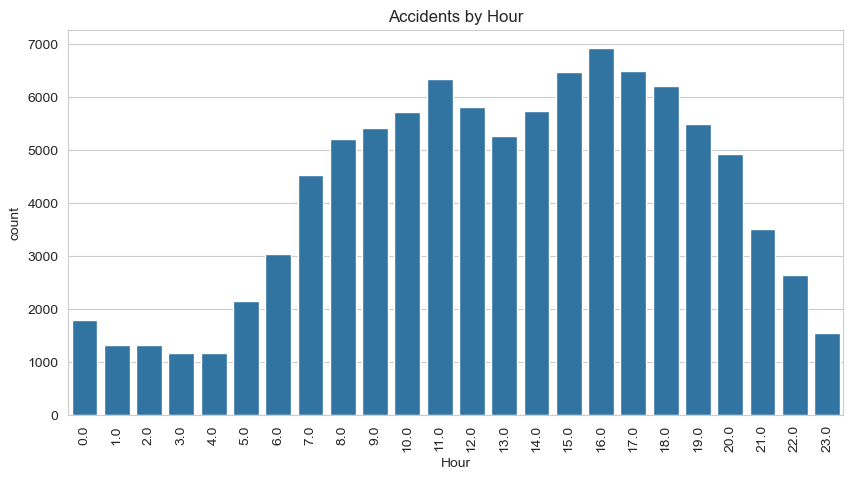

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour")
plt.xticks(rotation=90)
plt.show()

In [12]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour'],
      dtype='object')


In [13]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

In [14]:
df["Month"] = df["Start_Time"].dt.month

In [15]:
df["Month"] = df["Start_Time"].dt.month_name()

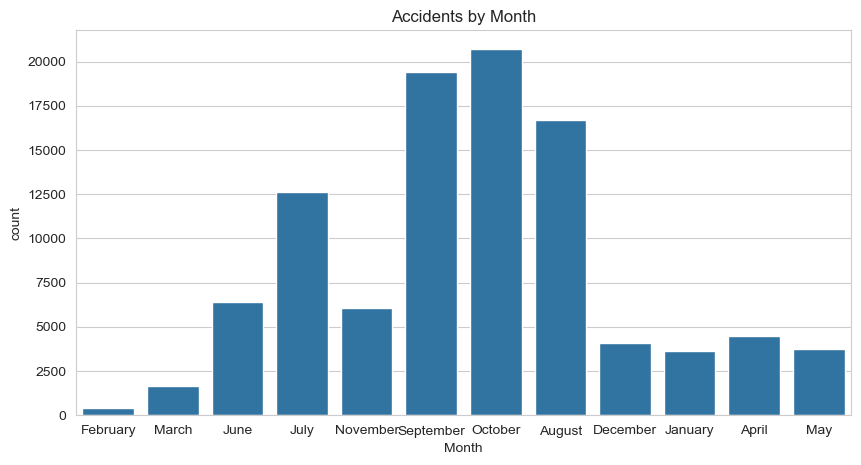

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x="Month", data=df)
plt.title("Accidents by Month")
plt.show()

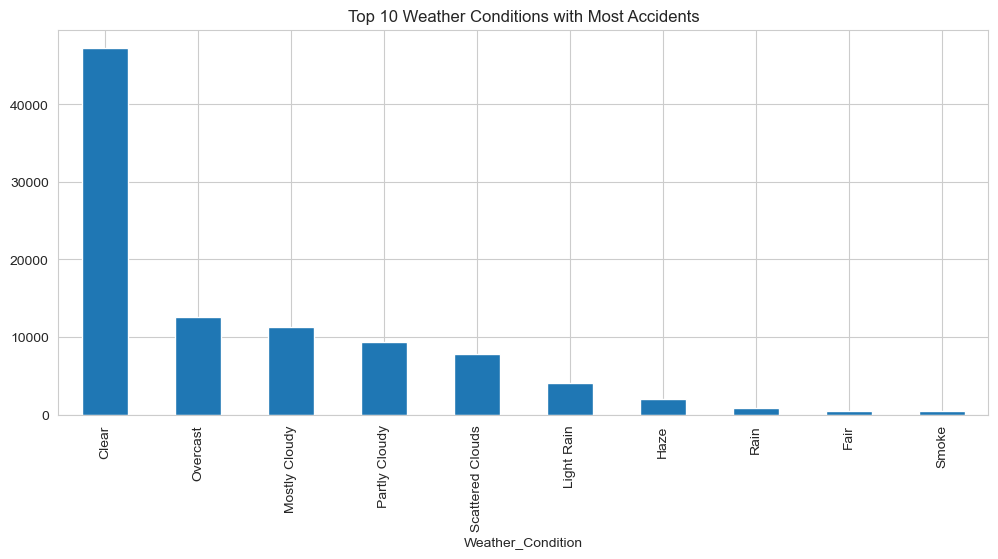

In [17]:
plt.figure(figsize=(12,5))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Weather Conditions with Most Accidents")
plt.show()

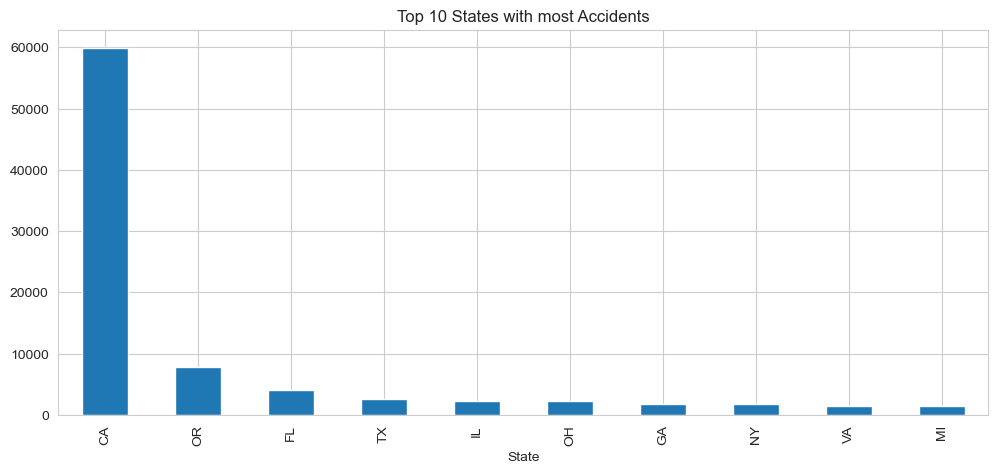

In [18]:
plt.figure(figsize=(12,5))
df['State'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 States with most Accidents")
plt.show()

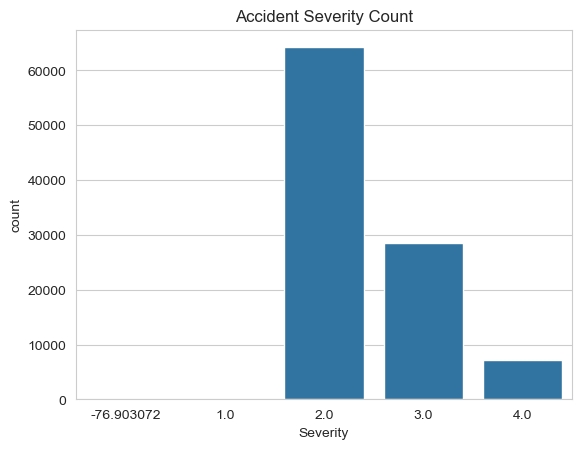

In [19]:
sns.countplot(x="Severity", data=df)
plt.title("Accident Severity Count")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

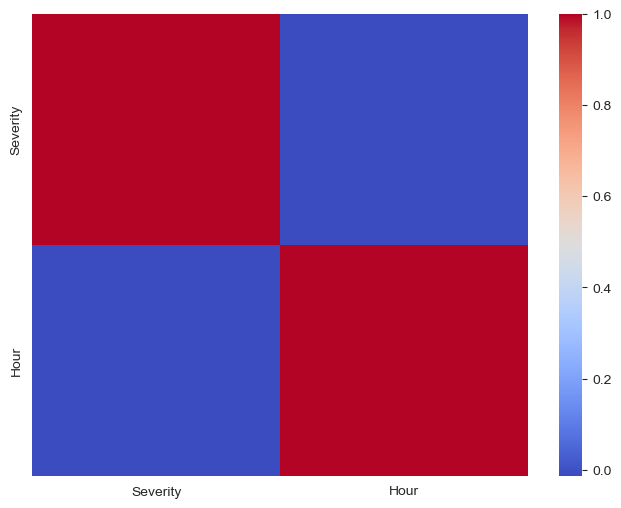

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm")
plt.tilte("Correlation Matrix")
plt.show()